## Atividade 2 - Regressão Linear Simples

Aluno: Marcos Wenneton Vieira de Araujo

### Carregando o dataset

In [1]:
# Carregando o Dataset Boston Houses
from sklearn.datasets import load_boston
boston = load_boston() 

# Carregando Bibliotecas Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 
import seaborn as sns

In [2]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['target'] = boston.target

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Calculando as correlações

In [4]:
correlation_matrix = df.corr().round(2)

In [5]:
correlation_matrix['target'].sort_values()

LSTAT     -0.74
PTRATIO   -0.51
INDUS     -0.48
TAX       -0.47
NOX       -0.43
CRIM      -0.39
AGE       -0.38
RAD       -0.38
CHAS       0.18
DIS        0.25
B          0.33
ZN         0.36
RM         0.70
target     1.00
Name: target, dtype: float64

Percebe-se que, assim como o atributo ```RM```, o ```LSTAT``` também tem uma correlação alta com o atributo alvo, ainda que negativa ($-0.74$). Portanto, iremos tomar esta variável para a geração do modelo de Regressão Linear simples.

### Gerando o modelo

In [31]:
import statsmodels.api as sm

In [76]:
X = df.LSTAT
y = df.target

In [77]:
# Ordinary least squares model
model = sm.OLS(y, X)

In [78]:
results = model.fit()

In [79]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.449
Model:                            OLS   Adj. R-squared (uncentered):              0.448
Method:                 Least Squares   F-statistic:                              410.9
Date:                Fri, 11 Jun 2021   Prob (F-statistic):                    2.71e-67
Time:                        23:29:53   Log-Likelihood:                         -2182.4
No. Observations:                 506   AIC:                                      4367.
Df Residuals:                     505   BIC:                                      4371.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Gerando um plot com a linha da regressão

In [80]:
# Range de valores para x e y
x_range = [X.min(), X.max()]
y_range = [y.min(), y.max()]

In [81]:
valores_previstos = results.predict(X)

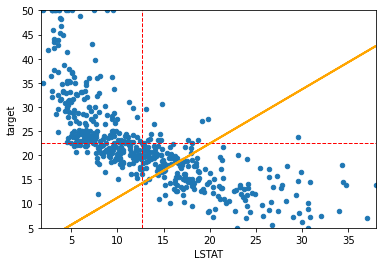

In [82]:
# Primeira camada do Scatter Plot
scatter_plot = df.plot(kind = 'scatter', x = 'LSTAT', y = 'target', xlim = x_range, ylim = y_range)

# Segunda camada do Scatter Plot (médias)
meanY = scatter_plot.plot(x_range, [y.mean(),y.mean()], '--', color = 'red', linewidth = 1)
meanX = scatter_plot.plot([X.mean(),X.mean()], y_range, '--', color = 'red', linewidth = 1)

# Terceira camada do Scatter Plot (linha de regressão)
regression_line = scatter_plot.plot(X, valores_previstos, '-', color = 'orange', linewidth = 2)